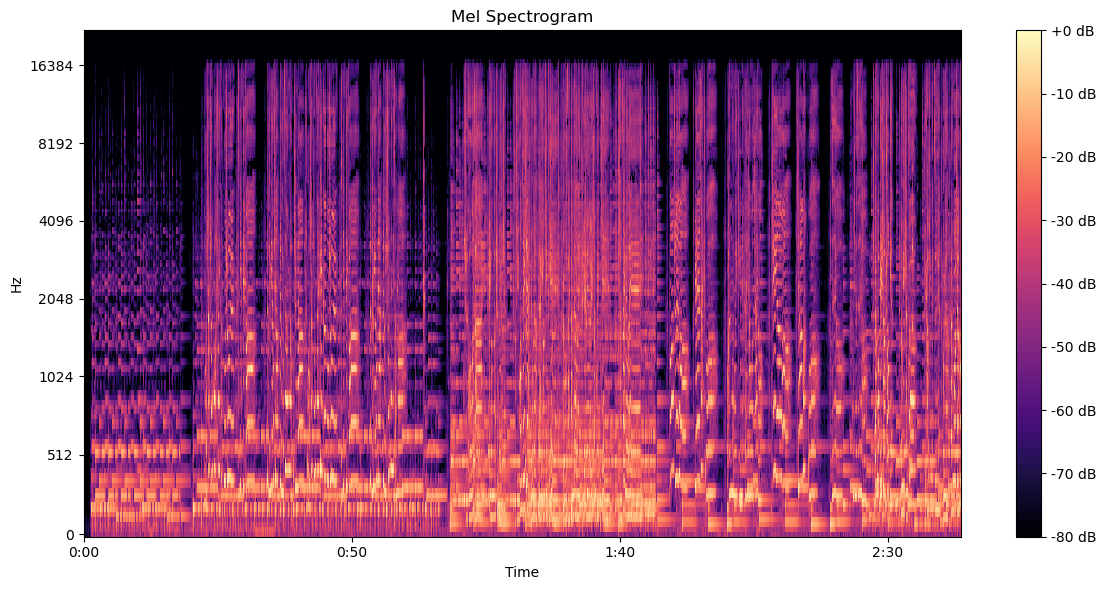

Recognized Chords:
 [(  0. ,   2.5, 'N') (  2.5,  11. , 'F#:min') ( 11. ,  12. , 'D:maj')
 ( 12. ,  18.1, 'F#:min') ( 18.1,  20.5, 'D:maj') ( 20.5,  24.3, 'C:maj')
 ( 24.3,  26.3, 'A:maj') ( 26.3,  29. , 'D:maj') ( 29. ,  32. , 'A:maj')
 ( 32. ,  34.8, 'C:maj') ( 34.8,  37.2, 'F#:min') ( 37.2,  39.4, 'D:maj')
 ( 39.4,  45.6, 'A:maj') ( 45.6,  48.4, 'D:maj') ( 48.4,  51.4, 'A:maj')
 ( 51.4,  53.9, 'C:maj') ( 53.9,  56.2, 'F#:min') ( 56.2,  58.9, 'D:maj')
 ( 58.9,  59.5, 'G:min') ( 59.5,  63.5, 'C:maj') ( 63.5,  68. , 'F#:min')
 ( 68. ,  71.8, 'E:min') ( 71.8,  78.2, 'A:maj') ( 78.2,  80.9, 'G:maj')
 ( 80.9,  82.1, 'B:min') ( 82.1,  82.7, 'G:maj') ( 82.7,  87.5, 'A:maj')
 ( 87.5,  91.9, 'G:maj') ( 91.9,  97.1, 'A:maj') ( 97.1, 101.9, 'G:maj')
 (101.9, 106.6, 'A:maj') (106.6, 107.6, 'E:min') (107.6, 111.1, 'G:maj')
 (111.1, 115.4, 'D:maj') (115.4, 116.8, 'A:maj') (116.8, 121.2, 'G:maj')
 (121.2, 125.6, 'A:maj') (125.6, 127. , 'B:min') (127. , 130.5, 'G:maj')
 (130.5, 134.4, 'D:maj') (134.

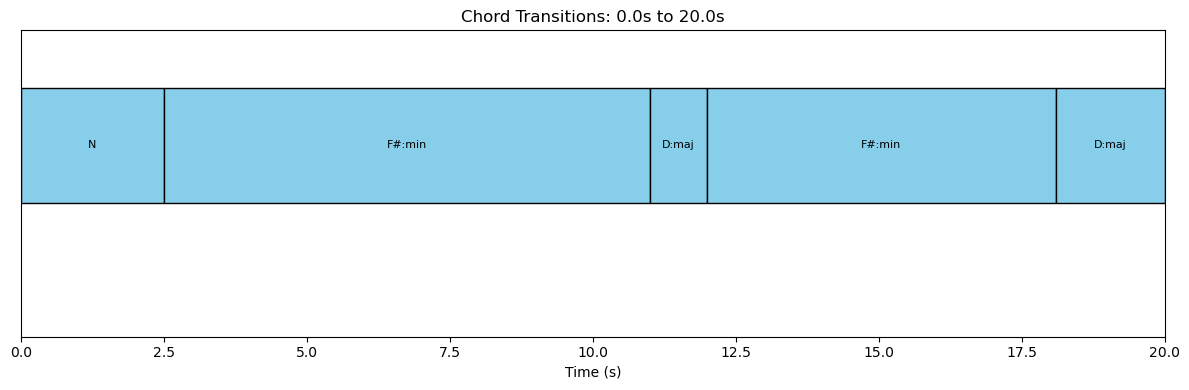

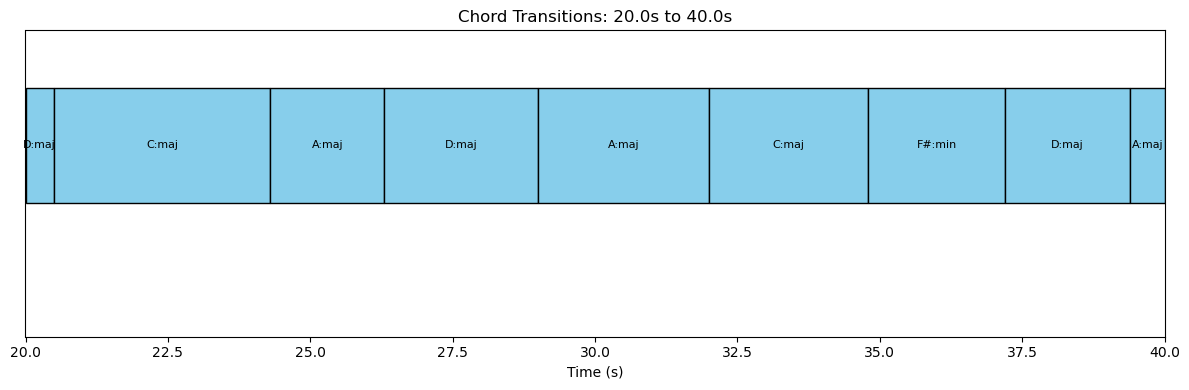

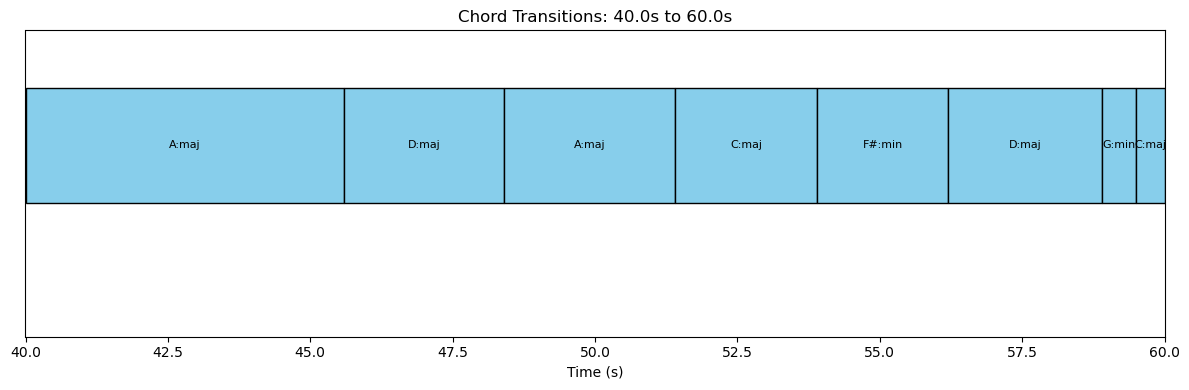

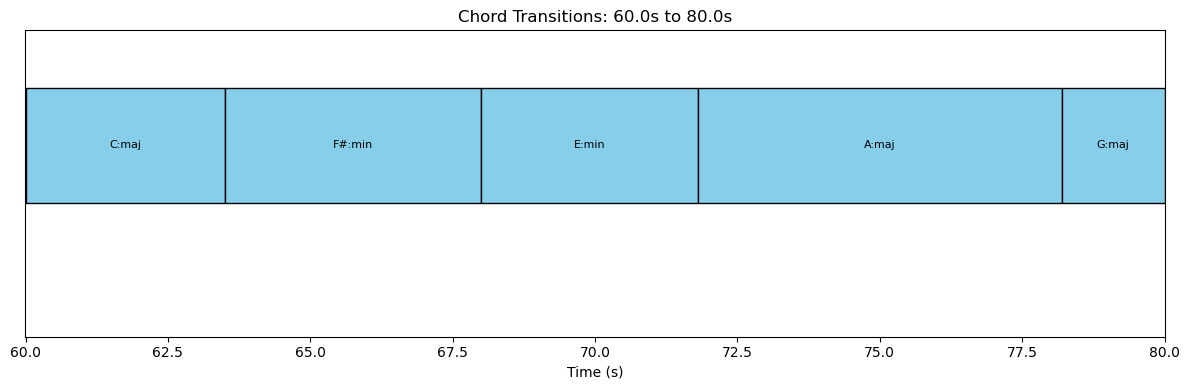

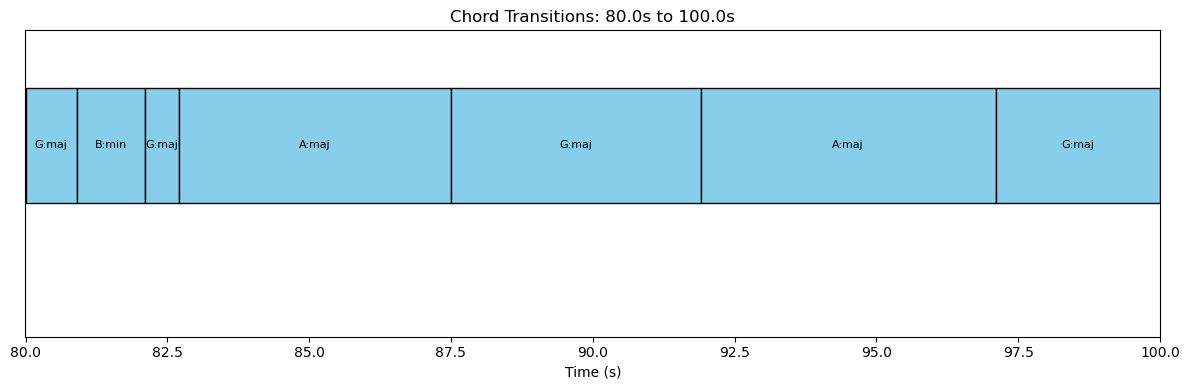

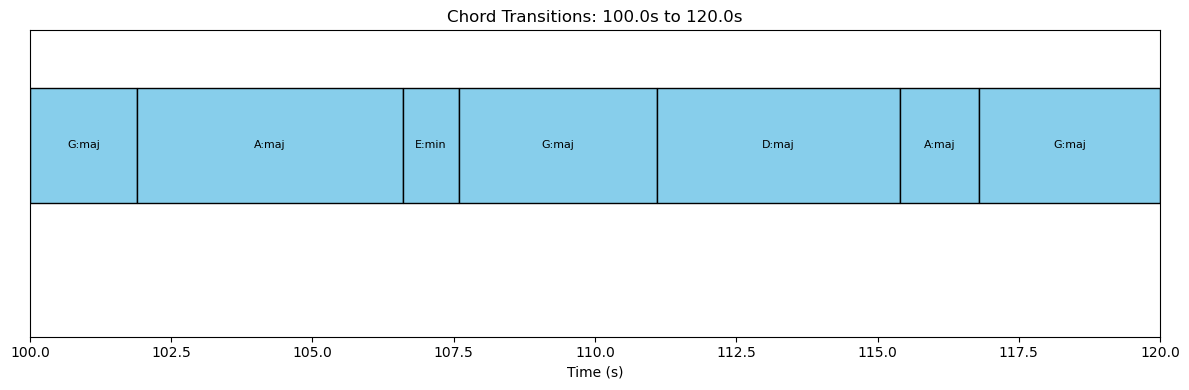

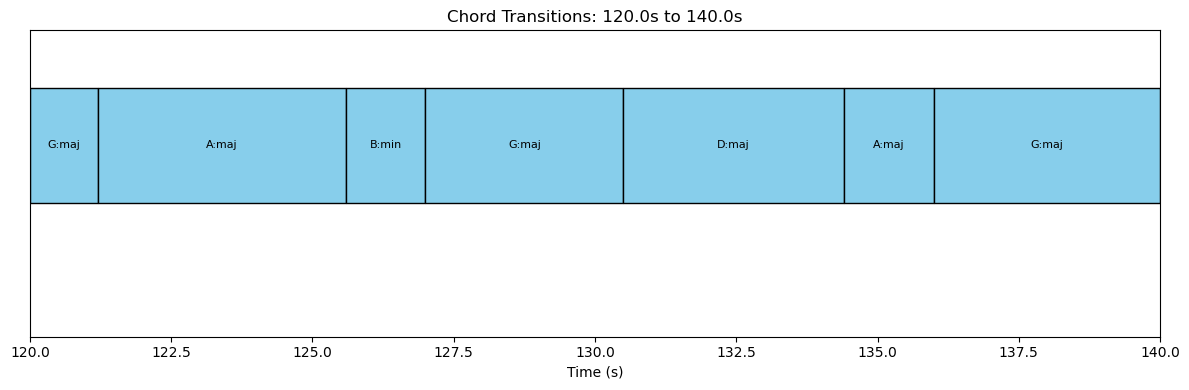

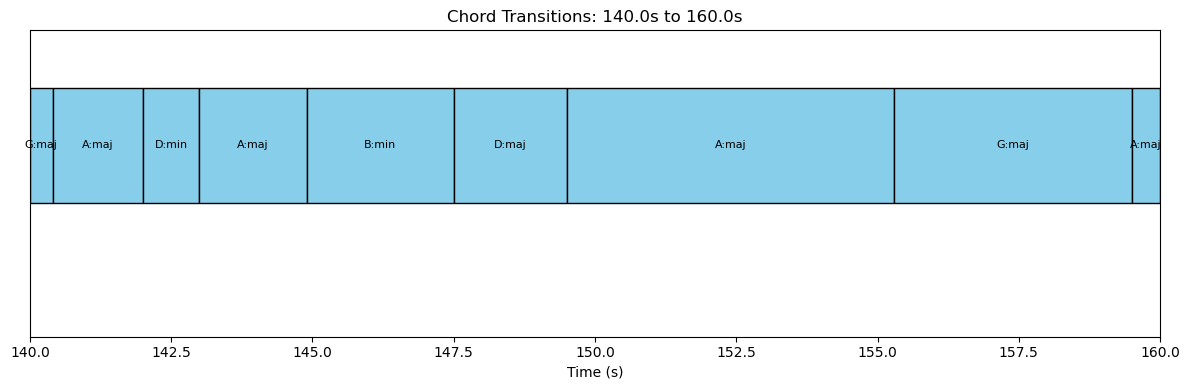

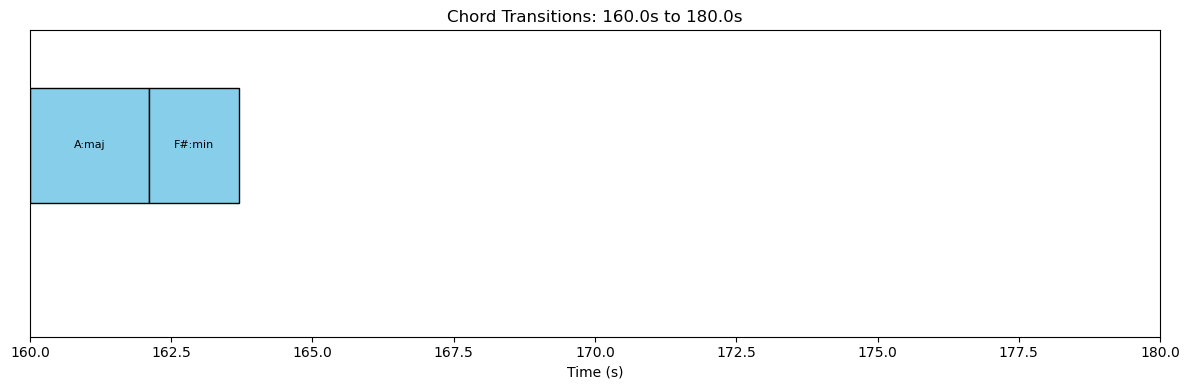

In [41]:
import numpy as np
import librosa
import madmom
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import subprocess

# 讀取音檔
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

# 提取梅爾頻譜圖特徵
def extract_features(y, sr):
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# 和弦識別
def recognize_chords(file_path):
    # 處理 WAV 格式的音檔
    chroma_processor = madmom.audio.chroma.DeepChromaProcessor()
    chroma = chroma_processor(file_path)

    # 進行和弦識別
    processor = madmom.features.chords.DeepChromaChordRecognitionProcessor()
    chords = processor(chroma)

    return chords

# MP3 轉 WAV，自動覆寫已存在的 WAV檔
def convert_mp3_to_wav(mp3_path, wav_path):
    command = ["ffmpeg", "-y", "-i", mp3_path, wav_path]  # 添加 -y 選項以自動覆寫
    try:
        subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while converting mp3 to wav: {e.stderr.decode()}")

# 繪製梅爾頻譜圖
def plot_mel_spectrogram(mel_spec_db, sr):
    plt.figure(figsize=(12, 6)) 
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# 繪製和弦進行的圖表
def plot_chord_transitions(chords, start_time, end_time):
    plt.figure(figsize=(12, 4))
    for start, end, chord in chords:
        if end > start_time and start < end_time:
            rect_start = max(start, start_time)
            rect_end = min(end, end_time)
            plt.gca().add_patch(mpatches.Rectangle((rect_start, 0.35), rect_end - rect_start, 0.3, edgecolor='black', facecolor='skyblue'))
            plt.text(rect_start + (rect_end - rect_start) / 2, 0.5, chord, va='center', ha='center', fontsize=8)

    plt.xlim(start_time, end_time)  # x軸
    plt.ylim(0, 0.8)  # y軸
    plt.xlabel('Time (s)')
    plt.yticks([])
    plt.title(f'Chord Transitions: {start_time:.1f}s to {end_time:.1f}s')
    plt.tight_layout()
    plt.show()
    plt.close()  

# 主程式
if __name__ == "__main__":
    audio_path_mp3 = r"C:\Users\VivoBook\Desktop\music.mp3"
    audio_path_wav = r"C:\Users\VivoBook\Desktop\music.wav"

    # MP3轉換為WAV檔（供madmom使用）
    convert_mp3_to_wav(audio_path_mp3, audio_path_wav)

    # 讀取音檔
    y, sr = load_audio(audio_path_wav)

    # 提取梅爾頻譜圖特徵
    mel_spec_db = extract_features(y, sr)

    # 繪製梅爾頻譜圖
    plot_mel_spectrogram(mel_spec_db, sr)

    # 和弦識別
    chords = recognize_chords(audio_path_wav)
    print("Recognized Chords:\n", chords)

    # 圖表每次只顯示20的和弦進行
    segment_length = 20  
    total_duration = chords[-1][1] if len(chords) > 0 else 0

    for start_time in np.arange(0, total_duration, segment_length):
        end_time = start_time + segment_length
        plot_chord_transitions(chords, start_time, end_time)